In [9]:
from keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

data_train = pd.read_csv('data/FashionMNIST/fashion-mnist_train.csv')
data_test = pd.read_csv('data/FashionMNIST/fashion-mnist_test.csv')

img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

X = np.array(data_train.iloc[:, 1:])
y = to_categorical(np.array(data_train.iloc[:, 0]))

#Here we split validation data to optimiza classifier during training
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

#Test data
X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))



X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_test /= 255
X_val /= 255

In [16]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

batch_size = 256
num_classes = 10
epochs = 50

#input image dimensions
img_rows, img_cols = 28, 28

model = Sequential()
model.add(Conv2D(128, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 128)       1280      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 128)       147584    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 3, 3, 128)         147584    
__________

In [18]:
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))
score = model.evaluate(X_test, y_test, verbose=0)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 392s - loss: 0.9652 - acc: 0.6389 - val_loss: 0.5530 - val_acc: 0.7951
Epoch 2/50
48000/48000 [==============================] - 388s - loss: 0.5625 - acc: 0.7879 - val_loss: 0.4376 - val_acc: 0.8383
Epoch 3/50
48000/48000 [==============================] - 388s - loss: 0.4775 - acc: 0.8245 - val_loss: 0.3810 - val_acc: 0.8556
Epoch 4/50
48000/48000 [==============================] - 388s - loss: 0.4278 - acc: 0.8420 - val_loss: 0.3427 - val_acc: 0.8717
Epoch 5/50
48000/48000 [==============================] - 393s - loss: 0.3885 - acc: 0.8580 - val_loss: 0.3413 - val_acc: 0.8722
Epoch 6/50
48000/48000 [==============================] - 388s - loss: 0.3667 - acc: 0.8656 - val_loss: 0.3022 - val_acc: 0.8871
Epoch 7/50
48000/48000 [==============================] - 388s - loss: 0.3475 - acc: 0.8718 - val_loss: 0.2919 - val_acc: 0.8936
Epoch 8/50
48000/48000 [=======================

In [19]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

('Test loss:', 0.20356046823859214)
('Test accuracy:', 0.92779999999999996)


In [20]:
model_json = model.to_json()
with open("model/fashionMNISTModelv3.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model/fashionMNISTModelv3.h5")
print("Saved model to disk")

Saved model to disk


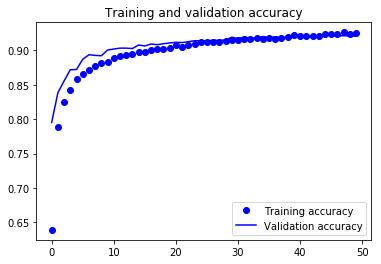

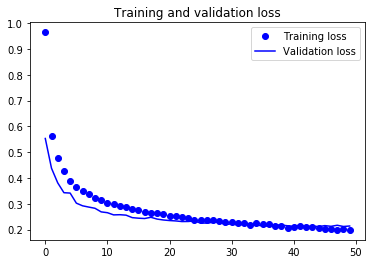

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()